# 23/CS/301 Piyush Yadav 
## Lab 03 (2 hrs) – Encoding → Scaling → Feature Engineering → Sampling
## Learning Outcomes
### By the end of this lab, students will be able to:
- Implement an end-to-end preprocessing pipeline in sklearn.
- Perform feature engineering &amp; selection.
- Save train/test splits and preprocessing artifacts.

# 1. Build sklearn pipeline

### Load dataset (e.g., Titanic from Kaggle).

### Identify:
- Categorical features → use OneHotEncoder.
- Numerical features → use StandardScaler or MinMaxScaler.
- Create a pipeline using ColumnTransformer + Pipeline.

In [15]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Example dataset: Titanic
df = pd.read_csv("titanic.csv")

X = df.drop("Survived", axis=1)   # Features
y = df["Survived"]                # Target

# Identify feature types
num_features = ["Age", "Fare"]            # numeric
cat_features = ["Sex", "Embarked"]        # categorical

# Numeric transformer: impute NaN → median, then scale
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical transformer: impute NaN → most frequent, then one-hot encode
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine into one ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)

# 2. Correlation Heatmap & Drop Redundant Features

- Compute correlation on numerical features.
- Drop highly correlated (>0.9) ones.

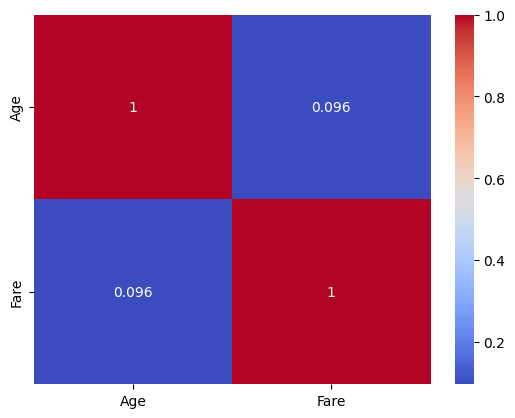

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[num_features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

# Example: drop "Fare" if highly correlated
df = df.drop("Fare", axis=1)


# 3. Feature Engineering

- Create new features (e.g., FamilySize = SibSp + Parch + 1).
- Handle missing values (SimpleImputer).

In [17]:
from sklearn.impute import SimpleImputer

X["FamilySize"] = X["SibSp"] + X["Parch"] + 1


# 4. Stratified Sampling

- Use stratified split (preserves class balance).

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Full Pipeline

In [19]:
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# 6. Save Artifacts

- Save splits and pipeline for reproducibility.

In [20]:
import joblib

joblib.dump(model, "titanic_pipeline.pkl")
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)
